## 결정 트리 모델의 시각화(Decision Tree Visualization)

### 한글폰트 처리 

In [47]:
import warnings 
warnings.filterwarnings('ignore')

from matplotlib import font_manager, rc
font_name  = font_manager.FontProperties(fname = "c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)
# 마이너스 부호 표시 
plt.rcParams['axes.unicode_minus'] = False

### 패키지 로드

In [133]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np

### 학습 및 테스트 세스 분리 및 학습

In [134]:
dt_clf = DecisionTreeClassifier(random_state=156)

#데이터세트 로드- 학습 및 테스트세트 분리 - 학습
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = .2, random_state=11)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

### 의사결정트리 익스포트 및 임포트

In [135]:
from sklearn.tree import export_graphviz
# export_graphviz호출결과로 out_file지정된 파일을 생성
export_graphviz(dt_clf, out_file = 'iris_tree.dot', class_names = iris_data.target_names, feature_names = iris_data.feature_names, \
               impurity=True, filled=True)

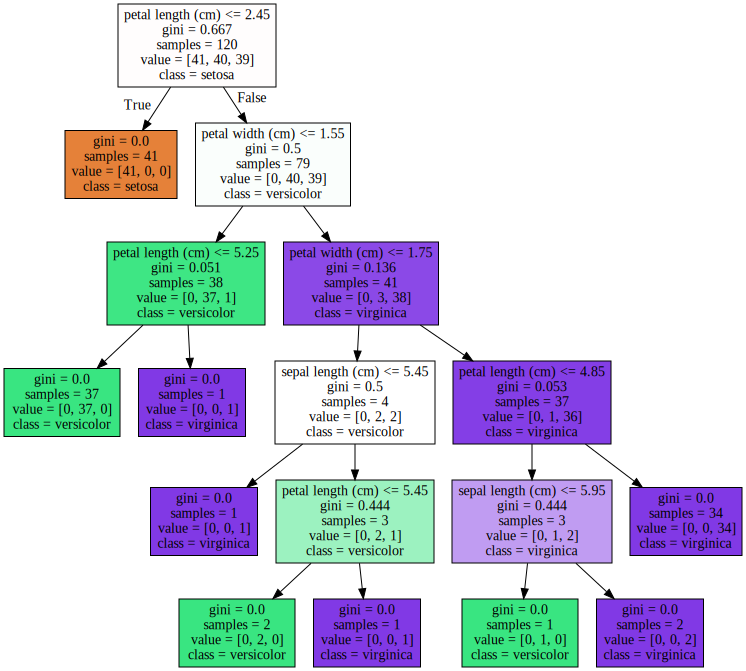

In [136]:
import graphviz

# 위에서 생성된 파일을 Graphviz로 읽어서 시각화
with open("iris_tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)    

### 의사결정 트리 파라미터 변경에 따른 트리 변화
* min_samples_split - `4`

In [137]:
from sklearn.tree import export_graphviz
import graphviz
    
def fit_decisiontree(random_state, mdth=None, mss=2, msl=1, ):
    """
    After fit and return decision tree classifier
    """
    clf = DecisionTreeClassifier(random_state = random_state, max_depth=mdth, min_samples_split = mss, min_samples_leaf=msl)
    iris_data = load_iris()
    
    X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.2, random_state = 12)
    clf.fit(X_train, y_train)  
    return clf

In [138]:
random_state = np.random.randint(low=100, high=800)
fit_decisiontree(random_state, mdth=None, mss=4)

DecisionTreeClassifier(min_samples_split=4, random_state=795)

In [139]:
from sklearn.tree import export_graphviz
# export_graphviz호출결과로 out_file지정된 파일을 생성
export_graphviz(dt_clf, out_file = 'tree.dot', class_names = iris_data.target_names, feature_names = iris_data.feature_names, \
               impurity=True, filled=True)

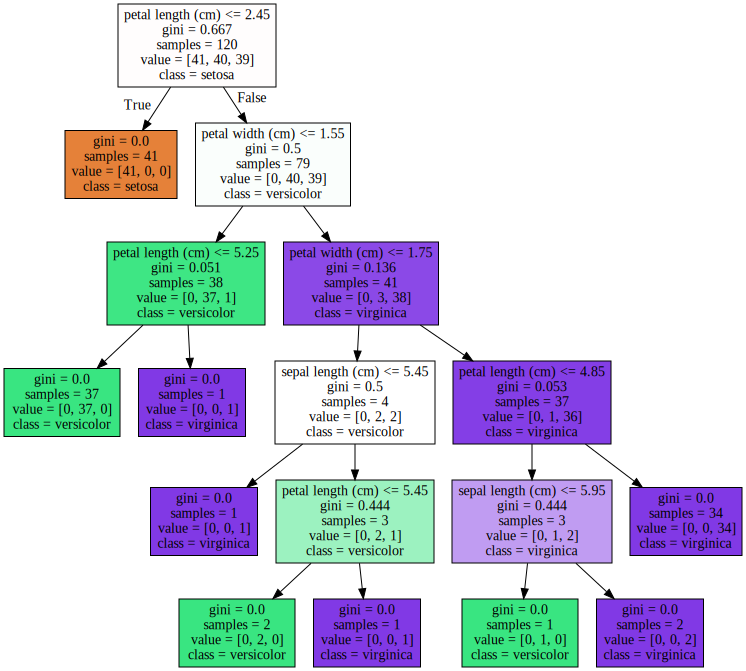

In [140]:
import graphviz

# 위에서 생성된 파일을 Graphviz로 읽어서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)    

* min_sample_leaf = `4`

In [141]:
random_state = np.random.randint(low=100, high=800)
fit_decisiontree(random_state, msl= 4)

DecisionTreeClassifier(min_samples_leaf=4, random_state=600)

In [142]:
from sklearn.tree import export_graphviz
# export_graphviz호출결과로 out_file지정된 파일을 생성
export_graphviz(dt_clf, out_file = 'tree.dot', class_names = iris_data.target_names, feature_names = iris_data.feature_names, \
               impurity=True, filled=True)

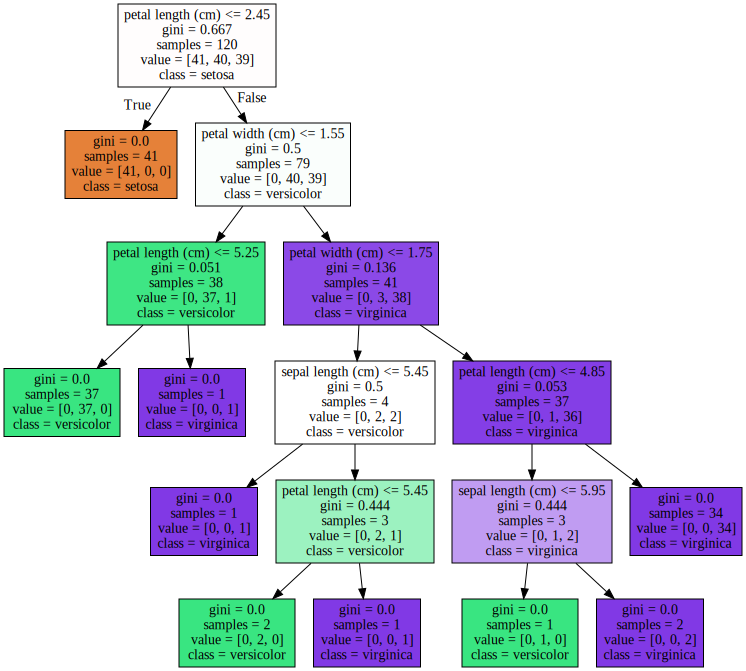

In [143]:
import graphviz

# 위에서 생성된 파일을 Graphviz로 읽어서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)    

* max_depth = `3`

In [144]:
random_state = np.random.randint(low=100, high=800)
fit_decisiontree(random_state, mdth=3)

DecisionTreeClassifier(max_depth=3, random_state=109)

In [145]:
from sklearn.tree import export_graphviz
# export_graphviz호출결과로 out_file지정된 파일을 생성
export_graphviz(dt_clf, out_file = 'tree.dot', class_names = iris_data.target_names, feature_names = iris_data.feature_names, \
               impurity=True, filled=True)

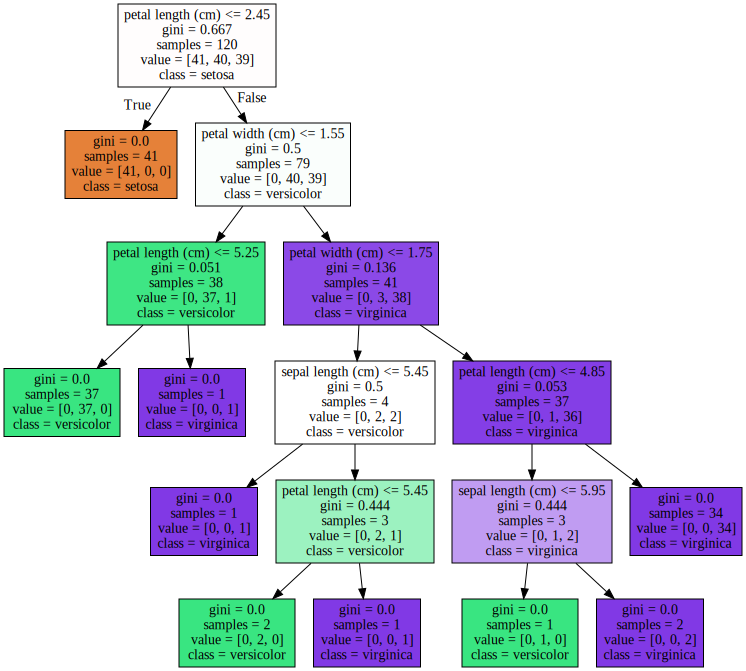

In [146]:
import graphviz

# 위에서 생성된 파일을 Graphviz로 읽어서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)    

### feature_importance를 이용한 피처별 중요도 시각화
사이킷런의 DecisionTreeClassifier객체는 feature_importances_를 통해 학습/예측을 위해서 중요한 Feature들을 선택할 수 있게 정보를 제공

In [147]:
%matplotlib inline
def show_feature_importances(df, clf):
    import seaborn as sns
    import numpy as np    
    """
    Plot the feature importances
    """
    # feature importance추출
    print("Feature Importance : \n{0}".format(np.round(clf.feature_importances_, 3)))
    
    # feature importance mapping
    for name, value in zip(df.feature_names, clf.feature_importances_):
        print("{0} - {1:.3f}".format(name, value))
    sns.barplot(x = clf.feature_importances_, y = df.feature_names)

Feature Importance : 
[0.025 0.    0.555 0.42 ]
sepal length (cm) - 0.025
sepal width (cm) - 0.000
petal length (cm) - 0.555
petal width (cm) - 0.420


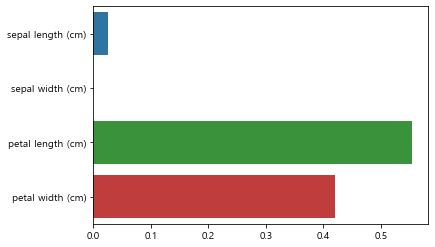

In [156]:
show_feature_importances(iris_data, dt_clf)

* Petal Length(꽃받침 길이) 가 가장 중요한 피처임을 알수있다.

### Read Event Print Loop for Overfitting
#### 참조사이트 
* [clim 함수](https://www.geeksforgeeks.org/matplotlib-pyplot-clim-in-python/)
* [meshgrid](https://pinkwink.kr/717)

In [152]:
from sklearn.tree import DecisionTreeClassifier

In [155]:
display(X_features, y_labels)
display(X_features.shape, y_labels.shape)  # (100, 2), (100)

array([[ 0.12041909, -1.68941375],
       [ 1.09665605,  1.79445113],
       [ 0.88426577,  1.43370121],
       [ 0.95048011, -0.56202253],
       [ 1.04421447,  0.02899023],
       [ 0.50102164, -1.27508231],
       [ 1.10447379,  0.35117341],
       [-2.5077599 ,  2.48857017],
       [-0.00811816,  0.11564734],
       [ 0.31338067, -0.87926516],
       [-0.04687748,  1.35489986],
       [ 1.20888898,  0.64232637],
       [ 1.71173001, -1.04637674],
       [ 1.29670808, -0.6054158 ],
       [ 1.24188996, -0.3819388 ],
       [-1.78273822,  1.52817583],
       [-1.50514147,  1.27186707],
       [ 0.87163989, -0.42276158],
       [ 2.53026908, -1.61974843],
       [ 0.95000368,  1.83240861],
       [-1.53716448, -0.89497353],
       [-2.13650855,  2.73389996],
       [ 1.01037788,  0.59402713],
       [ 1.9876467 , -0.22375521],
       [ 1.12463497,  2.13646176],
       [-0.65122279,  0.97865617],
       [ 0.85144036,  0.42548085],
       [-0.10789457, -0.65942376],
       [-0.41699944,

array([0, 1, 1, 1, 2, 2, 1, 0, 2, 2, 0, 1, 2, 1, 2, 0, 0, 1, 2, 1, 2, 0,
       1, 2, 1, 0, 2, 2, 2, 0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 0, 0, 1, 0, 2,
       0, 2, 1, 0, 2, 0, 2, 2, 2, 1, 0, 1, 1, 0, 2, 0, 2, 0, 0, 2, 1, 1,
       0, 1, 1, 2, 1, 0, 2, 2, 2, 0, 0, 1, 1, 0, 2, 1, 2, 1, 0, 2, 1, 1,
       1, 1, 0, 0, 1, 0, 2, 2, 0, 2, 0, 0])

(100, 2)

(100,)

(-3.23007287141407, 4.200495285924822)

(-2.8792388033743173, 4.004100761986581)

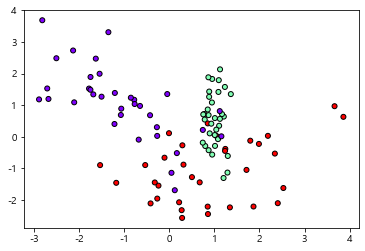

In [185]:
X = X_features
y = y_labels
fig, ax = plt.subplots()
ax.scatter(X_features[:, 0], X_features[:, 1], c = y, s = 25, marker = 'o', cmap='rainbow', edgecolors='k', zorder=3, clim=(y.min(), y.max()))
display(ax.get_xlim())  # Return the x-axis view limits.
display(ax.get_ylim())  # Return the y-axis view limits.

(1000,)

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

(1000, 1000)

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

(1000, 1000)

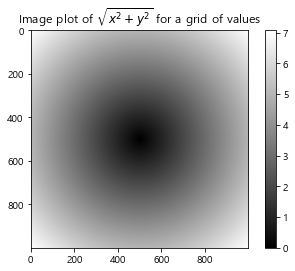

In [197]:
points = np.arange(-5, 5, 0.01)
points
display(points.shape)
display(np.meshgrid(points, points)[0])
display(np.meshgrid(points, points)[0].shape)
display(np.meshgrid(points, points)[1])
display(np.meshgrid(points, points)[1].shape)

xs, ys = np.meshgrid(points, points)  # 두개의 정방행을 가진 리스트를 리턴.
z = np.sqrt(xs ** 2 + ys ** 2)
z.shape

plt.title("Image plot of $\sqrt{x^2 +  y^2}$ for a grid of values")
plt.imshow(z, cmap = plt.cm.gray);plt.colorbar()
plt.show()

### 결정트리 과적합(overfitting)
* 사이킷런은 분류를위한 테스트용 데이터셋를 쉽게 만들 수 있도록 make_classification() 함수를 제공

In [ ]:
import numpy as np

# Classifier의 Decision Boundary를 시각화하는 함수
def visualizer_boundary(model, X, y):
    fig, ax = plt.subplots()
    
    # 학습 데이터를 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c = y, s=25, cmap='rainbow', edgecolor='k', 
              clim=(y.min(), y.max()), zorder=3) 
    ax.axis("tight")
    ax.axis("off")
    xlim_start, xlim_end = ax.get_xlim()
    ylim_start, ylim_end = ax.get_ylim()
    
    model.fit(X, y)
    
    xx, yy = np.meshgrid(np.linspace(xlim_start, xlim_end, num=200), np.linspace(ylim_start, ylim_end, num=200))
    

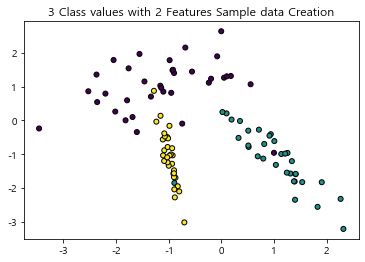

In [204]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data Creation")

# 2차원 시각화를 위해 피처는 2개, 클래스는 3가지 유형으로 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features = 2, n_classes = 3, n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 크래스 값은 다른 색깔로 표시
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, edgecolor='k')

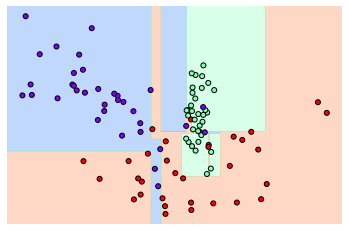

In [9]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약이 없는 결정트리의 학습과 결정 경계 시각화
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

In [164]:
# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

(1000, 1000)

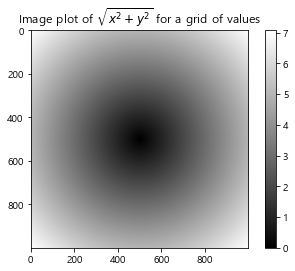

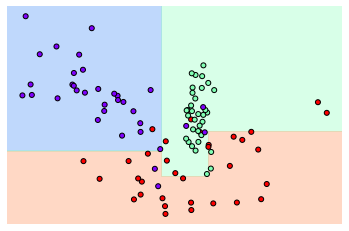

In [171]:
# min_samples_leaf = 6으로 틀 생성 조건을 제약한 결정 경계 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf = 6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

### 정리
* 의사결정트리 모델에 성능은 default세팅값보다 하이터 파라미터 튜닝을 더 적극적으로 해야 한다.
* 예를 들면, max_depth, min_samples_leaf정도는 상황에 따라 고려를 해야 될 수도 있다.

### 결정트리 실습 - 사용자 행동 인식 데이터세트
* UCI(머신러닝 리포지토리)에서 제공하는 사용자 행동인식 데이터세트에 예측 분류 수행
* 30명의 사용자에게 스마트폰 센서를 장착한뒤 사람의 동작과 관련된 여러가지 피처를 수집한 데이터
* [관련 사이트](http://archive.uci.edu/ml/datasets/)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# feature.txt파일에는 피처 이름 인덱스와 피처명이 공백으로 분리되어 있음.
# 이것을 데이터프레임으로 로드 
# sep의 옵션은 공백이 1개 이상것으로 분리.
feature_name_df = pd.read_csv("../data/human_activity/features.txt", sep="\s+", header=None, names=['column_index', 'column_name'])

display(feature_name_df.head())

# 피처명 인덱스를 제거하고 , 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:, 1]
display(feature_name.values, type(feature_name.values))
feature_name = feature_name.values.tolist()

display("전체 피처 중에서 10개만 추출  ", feature_name[:10])

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


array(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z',
       'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z',
       'tBodyAcc-sma()', 'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y',
       'tBodyAcc-energy()-Z', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y',
       'tBodyAcc-iqr()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y',
       'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1',
       'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3',
       'tBodyAcc-arCoeff()-X,4', 'tBodyAcc-arCoeff()-Y,1',
       'tBodyAcc-arCoeff()-Y,2', 'tBodyAcc-arCoeff()-Y,3',
       'tBodyAcc-arCoeff()-Y,4', 'tBodyAcc-arCoeff()-Z,1',
       'tBodyAcc-arCoeff()-Z,2', 'tBodyAcc-arCoeff()-Z,3',
       'tBodyAcc-arCoeff()-Z,4', 'tBodyAcc-correlation()-X,Y',
       'tBodyAcc-correlation()-

numpy.ndarray

'전체 피처 중에서 10개만 추출  '

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X']

#### 중복된 피처명 확인

In [5]:
feature_dup_df = feature_name_df.groupby('column_name').count()
display("중복된 피처 : ", feature_dup_df[feature_dup_df['column_index'] > 1].count())
display(feature_dup_df[feature_dup_df['column_index'] > 1].head())

'중복된 피처 : '

column_index    42
dtype: int64

,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


**중복된 피처명에 대해 원본 피처명에 `_1`혹은 `_2`를 붙혀서 데이터프레임을 반환하는 함수 작성.**

In [11]:
def get_new_feature_name(old_feature_name_df):
    """
    데이터프레임을 인자로 받아 중복된 피처들의 이름에 _1, _2 이렇게 라벨링해서 
    정제해 데이터프레임을 리턴
    """
    feature_dup_df = pd.DataFrame(data = old_feature_name_df.groupby('column_name').cumcount(), columns = ['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0] + '_'+ str(x[1]) if x[1] > 0 else x[0], axis = 1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis = 1)
    return new_feature_name_df

get_new_feature_name(feature_name_df)

,column_index,column_name,dup_cnt
0,1,tBodyAcc-mean()-X,0
1,2,tBodyAcc-mean()-Y,0
2,3,tBodyAcc-mean()-Z,0
3,4,tBodyAcc-std()-X,0
4,5,tBodyAcc-std()-Y,0
...,...,...,...
556,557,"angle(tBodyGyroMean,gravityMean)",0
557,558,"angle(tBodyGyroJerkMean,gravityMean)",0
558,559,"angle(X,gravityMean)",0
559,560,"angle(Y,gravityMean)",0


In [12]:
feature_name_df.head()

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


In [13]:
pd.DataFrame(feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt']).reset_index()

,index,dup_cnt
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
556,556,0
557,557,0
558,558,0
559,559,0


In [14]:
import pandas as pd
def get_human_dataset():
    """
    분리된 학습용/테스트용 피처 데이터 세트 리턴
    """
    # 각 데이터파일은 공백으로 분리되어있으므로 read_csv에서 공백문자를 sep으로 할당
    feature_name_df = pd.read_csv("../data/human_activity/features.txt", sep="\s+", header=None, names=['column_index', 'column_name'])
    
    # 중복된 피처명 변경
    new_feature_name_df = get_new_feature_name(feature_name_df)
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()   
    
    
    # 학습 데이터셋트와 테스트 피처 데이터를 DataFrame으로 로딩
    X_train = pd.read_csv("../data/human_activity/train/X_train.txt", sep="\s+", names = feature_name)
    X_test  = pd.read_csv("../data/human_activity/test/X_test.txt", sep="\s+", names = feature_name)
    
    # 레이블을 위한 테스트 데이터 세트 및 훈련용 데이터셋트 
    y_train = pd.read_csv("../data/human_activity/train/y_train.txt", sep="\s+", names=['action'], header=None)
    y_test  = pd.read_csv("../data/human_activity/test/y_test.txt", sep="\s+", names=['action'], header=None)
    
    return X_train, X_test, y_train, y_test  
X_train, X_test, y_train, y_test = get_human_dataset()

### 로드한 학습용 피처 데이터세트 살펴보기

In [15]:
print("## 학습 피처 데이터세트 info()")
print(X_train.info())

## 학습 피처 데이터세트 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


** 총 로우의 갯수 : 7352,변수 : 561, 데이터타입은 float64로 별도의 인코딩을 위한 전처리는 불필요한 것으로 판단.

#### 널값인 갯수

In [16]:
X_train.isna().sum().sum()

0

In [17]:
y_train['action'].value_counts()

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64

** 레이블값은 특정 값으로 왜곡되지 않고 분포가 고름.

### DecisionTreeClassifier를 이용한 동작예측분류 수행
* 모든 하이퍼 파라미터는 디폴트값 이용

### 사이킷런의 DecisionTreeClassifier를 이용해 동작예측 분류 수행

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#예제 반복시마다 동일한 예측 결과를 주어야 하기때문에 random_state설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)

pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
display("결정 예측 트리 정확도 : {0:.4f}".format(accuracy))
print("사용된 모든 하이퍼 파라미터 추출 : \n", dt_clf.get_params())

'결정 예측 트리 정확도 : 0.8548'

사용된 모든 하이퍼 파라미터 추출 : 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 156, 'splitter': 'best'}


* **GridSearchCV를 이용해 max_depth를 조정하면서 예측 성능 확인**

In [30]:
from sklearn.model_selection import GridSearchCV

In [34]:
params = {'max_depth': [6, 8, 10, 12, 16, 20, 24]}

# 총 35번 - cv * len(params)
grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)

print("GridSearchCV 최고 평균 정확도 수치 : {0:.4f}".format(grid_cv.best_score_))
print("GridSearchCV 최적 하이퍼 파라미터 : ", grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  6.5min finished


GridSearchCV 최고 평균 정확도 수치 : 0.8513
GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 16}


* 최적의 max_depth는 수행하는 pc마다 다를 수 있다. 개인 PC의 경우는 `max_depth`는 16나옴.
* 정확도 : 85퍼센트

In [15]:
help(grid_cv)

Help on GridSearchCV in module sklearn.model_selection._search object:

class GridSearchCV(BaseSearchCV)
 |  GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, iid='deprecated', refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)
 |  
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "predict", "predict_proba", "decision_function",
 |  "transform" and "inverse_transform" if they are implemented in the
 |  estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object.
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Either 

* **GridSearchCV.cv_results_ 속성을 통해 알아보는 예측 성능의 추이**

In [38]:
# GridSearchCV객체의 cv_result_속성을 DataFrame으로 변환
cv_result_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때이 테스트 세트 , 학습데이터 세트의 정화도 수치 추출
cv_result_df.head()
# mean_train_score - 헤더에서 존재하지 않음
cv_result_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


`max_depth`가 늘어난다고 해서 성능이 크게 개선되지는 않으며, 일종의 임계치값이 있음을 알수 있다.

**결정트리의 변화에 따른 성능 수치 변화**

In [41]:
max_depths = [6, 8, 10, 12, 16, 20, 24]

for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print("max_depth = {0}, 정확도 : {1:.4f}".format(depth, accuracy))

max_depth = 6, 정확도 : 0.8558
max_depth = 8, 정확도 : 0.8707
max_depth = 10, 정확도 : 0.8673
max_depth = 12, 정확도 : 0.8646
max_depth = 16, 정확도 : 0.8575
max_depth = 20, 정확도 : 0.8548
max_depth = 24, 정확도 : 0.8548


* max_depth가 8에서 정점을 찍고 이 값을 기점으로 떨어지기 시작함을 알 수 있다.
* 이처럼 결정트리는 깊이가 깊어질수록 과적합의 영향력이 커지므로 하이터 파라미터를 이용해 깊이를 제한할 수 있어야 합니다.
* 복잡한 모델보다는 깊이를 낮춘 단순한 모델이 더욱 효과적인 결과를 가져올수있음.

**max_depth와 min_sample_split을 같이 변경**
* GridSearchCV를 통한 성능 확인

In [21]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth': [8, 12, 16, 20], 
          'min_samples_split' : [16, 24]
         }

# cv - 교차검증세트 
grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring = 'accuracy', cv = 5, verbose = 1)
grid_cv.fit(X_train, y_train)

print("GridSearchCV 최고 평균 정확도 수치  : {0:.4f}".format(grid_cv.best_score_))
print("GridSearchCV 최적 하이퍼 파라미터   \n",grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  7.9min finished


GridSearchCV 최고 평균 정확도 수치  : 0.8549
GridSearchCV 최적 하이퍼 파라미터   
 {'max_depth': 8, 'min_samples_split': 16}


**What is the best estimator?**

In [45]:
best_dt_clf = grid_cv.best_estimator_

pred1 = best_dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print("결정트리 예측 정확도 : {0:.4f}".format(accuracy))

결정트리 예측 정확도 : 0.8575


In [22]:
best_dt_clf = grid_cv.best_estimator_

pred1 = best_dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print("결정 트리 예측 정확도 : {0:.4f}".format(accuracy))
print("가장 최적의 esitmator : ", grid_cv.best_estimator_)

결정 트리 예측 정확도 : 0.8717
가장 최적의 esitmator :  DecisionTreeClassifier(max_depth=8, min_samples_split=16, random_state=156)


**가장 중요한 Top20 중요 특성만 시각화**

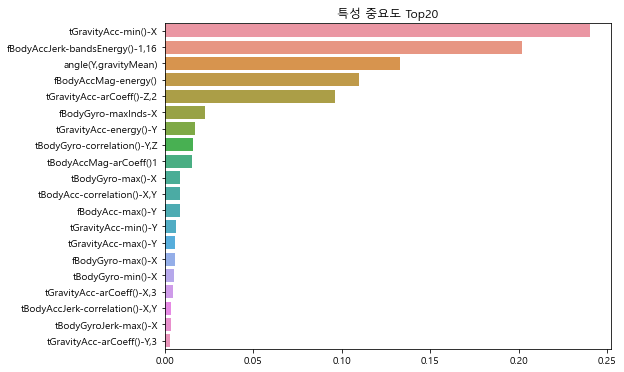

In [48]:
import seaborn as sns
ftr_imortances_values = best_dt_clf.feature_importances_

# Top중요도로 정렬을 쉽게 하고 , 시본(Seaborn)의 막대 그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_imortances_values, index = X_train.columns)

# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8, 6))
plt.title("특성 중요도 Top20")
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

## 정리
* 최상위 5개의 모션이 사용자의 행동인식에 영향을 가장 많이 주는것으로 나온다.
* 정보의 균일도에 기반한 규칙드리를 만들어서 예측을 수행
* 결정트리는 다른 알고리즘에 비해서 직관적이서 어떻게 예측결과가 도출되었는지 그 과정을 쉽게 알수 있다.
* 결정트리의 단점은 균일한 최종 예측결과를 도출하기 위해 결정 트리가 깊어지고 복잡해지면서 과적합이 쉽게 발생한다.